<a href="https://colab.research.google.com/github/selu01/housing_production/blob/main/notebooks/housing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

print something to test that Jupyter is working

# Let's make sure Python and sklearn versions are up to date!

This project requires Python 3.7 or above. assert function checks whether Python 3.7 is present in Colab

In [ ]:
import sys

assert sys.version_info >= (3, 7)

It also requires Python library for ML Scikit-Learn ≥ 1.0.1 to be present in Colab

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# STEP 1. Get the Data

### Download the data

We will import the data stored in .tgz file online

In [ ]:
# STEP 1: Import the tools we need
from pathlib import Path        # 🗺️ GPS for finding files
import pandas as pd             # 📊 Excel on steroids
import tarfile                  # 🔓 Unlocks compressed files
import urllib.request           # 🌐 Downloads from internet

# STEP 2: Create a function (a recipe) to get the data
def load_housing_data():

    # STEP 3: Check if we already have the file
    tarball_path = Path("datasets/housing.tgz")

    if not tarball_path.is_file():  # If file doesn't exist...

        # STEP 4: Create a folder to store it
        Path("datasets").mkdir(parents=True, exist_ok=True)

        # STEP 5: Download from GitHub
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        # ☝️ Like right-clicking "Save As..." but in code

    # STEP 6: Unzip the compressed file
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="datasets")

    # STEP 7: Read the CSV and convert to DataFrame
    return pd.read_csv(Path("datasets/housing/housing.csv"))

# STEP 8: Actually run the function and save result
housing = load_housing_data()

/tmp/ipython-input-815172611.py:25: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


### Look at the data structure

Before full EDA we will look at the data structure with .head(), .info() and .describe()

In [ ]:
housing.head()

# BREAKS DOWN TO:
# housing     = Our DataFrame (the whole dataset)
# .head()     = Method that shows first 5 rows
# No argument = Defaults to 5 rows (you can do .head(10))

# RETURNS:
# A small preview table with 5 rows × 10 columns


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info() ## great to check missing values and whether data type makes sense

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe() ## descriptive statistics - now, this is EDA!

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 2. Visualize the data to understand its structure better

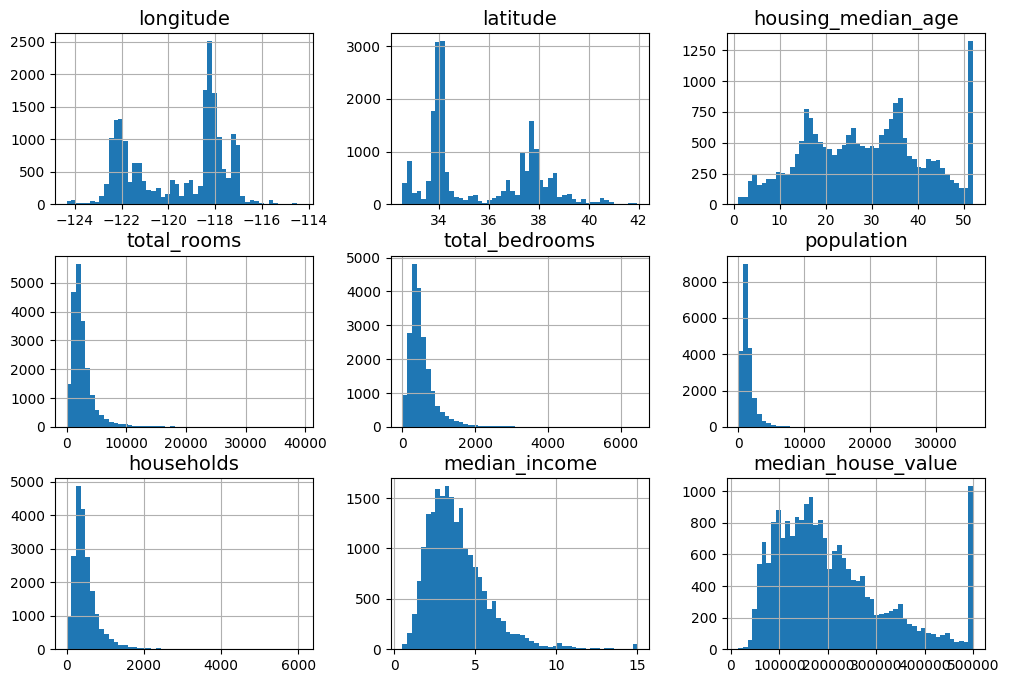

In [ ]:
import matplotlib.pyplot as plt

# What it does: Imports Python's main plotting library
# Think of it as: Loading your drawing tools

plt.rc('font', size=14)              # Default text size
plt.rc('axes', labelsize=14, titlesize=14)  # Axis labels and titles
plt.rc('legend', fontsize=14)        # Legend text
plt.rc('xtick', labelsize=10)        # X-axis numbers
plt.rc('ytick', labelsize=10)        # Y-axis numbers

# What it does: Makes all text readable (bigger than defaults)
# You can skip these lines - they're just "make it pretty" code

housing.hist(bins=50, figsize=(12, 8))

# RESULT: Creates 10 separate histograms (one per column)

plt.show()

# 3. Create a Test Set

In [ ]:
from sklearn.model_selection import train_test_split
# Import scikit-learn's standard data splitting function
# sklearn = Industry-standard machine learning library
# train_test_split = The go-to function for splitting datasets

# Split data: 80% training, 20% testing
train_set, test_set = train_test_split(
    housing,            # The full dataset (20,640 rows)
    test_size=0.2,      # 20% goes to testing (4,128 rows)
    random_state=42     # Seed for reproducibility
)

# WHAT HAPPENS:
# 1. Function shuffles all 20,640 rows randomly
# 2. Takes first 80% (16,512 rows) → train_set
# 3. Takes last 20% (4,128 rows) → test_set
# 4. Returns both as separate DataFrames

# RESULT:
# train_set = 16,512 rows × 10 columns
# test_set  = 4,128 rows × 10 columns

# PARAMETER BREAKDOWN:
# test_size=0.2
#   → 0.2 = 20% (most common)
#   → 0.3 = 30%
#   → 4128 = exact number of samples
#   → Industry standard: 80/20 or 70/30 split
#
# random_state=42
#   → Seeds the random number generator
#   → Same seed = Same split every time
#   → Different seed = Different split
#   → No seed = Different split each run
#   → Why 42? Common convention (Hitchhiker's Guide joke)
#   → Could be any number: 42, 0, 123, etc.

print(f"✅ Training set: {len(train_set)} samples")
print(f"✅ Test set: {len(test_set)} samples")

# OUTPUT:
# ✅ Training set: 16512 samples
# ✅ Test set: 4128 samples
# Verification: 16512 + 4128 = 20,640 ✓

# WHY THIS SPLIT?
# TRAINING SET (80%):
#   → Used to teach the model
#   → Model "sees" these houses
#   → Learns patterns from these examples
#
# TEST SET (20%):
#   → Used to evaluate the model
#   → Model NEVER sees these during training
#   → Simulates "real world" new houses
#   → Prevents overfitting
#
# ANALOGY:
#   Training set = Practice exam questions
#   Test set = Actual exam (different questions)



✅ Training set: 16512 samples
✅ Test set: 4128 samples


## 4. Check for correlations

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
# Calculate correlation matrix for all numeric columns
#
# WHAT IS CORRELATION?
#   → Measures relationship between two variables
#   → Range: -1 to +1
#   → +1 = Perfect positive correlation (both increase together)
#   →  0 = No correlation (no relationship)
#   → -1 = Perfect negative correlation (one increases, other decreases)
#
# WHAT DOES .corr() DO?
#   → Compares EVERY numeric column with EVERY other numeric column
#   → Creates a matrix (table) of correlation values
#   → Example: How does 'median_income' relate to 'median_house_value'?
#
# numeric_only=True
#   → Only calculate for numeric columns (skip 'ocean_proximity')
#   → Prevents errors with categorical data
#   → Good practice for datasets with mixed types
#
# RESULT: corr_matrix is a 9×9 DataFrame
#   Rows: longitude, latitude, housing_median_age, total_rooms,
#         total_bedrooms, population, households, median_income,
#         median_house_value
#   Columns: Same as rows
#   Values: Correlation coefficients between -1 and 1

corr_matrix["median_house_value"].sort_values(ascending=False)
# Focus on ONE column: correlations with 'median_house_value' (our target)
#
# BREAKDOWN:
# corr_matrix["median_house_value"]
#   → Extract the column showing how ALL features correlate with house price
#   → Returns a Series with 9 values (one per feature)
#
# .sort_values(ascending=False)
#   → Sort from HIGHEST to LOWEST correlation
#   → ascending=False means biggest number first
#   → ascending=True would mean smallest first
#
# OUTPUT (typical):
# median_house_value     1.000000   ← Perfect (correlates with itself)
# median_income          0.688075   ← STRONGEST PREDICTOR! 💰
# total_rooms            0.134153   ← Weak positive
# housing_median_age     0.105623   ← Weak positive
# households             0.065843   ← Very weak positive
# total_bedrooms         0.049686   ← Almost no correlation
# population            -0.024650   ← Almost no correlation (slight negative)
# longitude             -0.045967   ← Almost no correlation (negative)
# latitude              -0.144160   ← Weak negative

# INTERPRETING THE RESULTS:
#
# 1. median_income (0.69) - STRONG POSITIVE ⭐
#    → Higher income → Higher house prices
#    → Makes perfect sense economically
#    → Best single feature for prediction
#
# 2. total_rooms (0.13) - WEAK POSITIVE
#    → More rooms → Slightly higher prices
#    → Weaker than expected (why? includes apartments)
#
# 3. housing_median_age (0.11) - WEAK POSITIVE
#    → Older homes slightly more valuable
#    → Could indicate established neighborhoods
#
# 4. latitude (-0.14) - WEAK NEGATIVE
#    → Further north → Slightly lower prices
#    → Reflects California's coastal premium in south
#
# 5. population/bedrooms (~0.05) - NEGLIGIBLE
#    → Almost no direct relationship
#    → Not useful predictors alone

# KEY INSIGHTS:
# ✅ median_income is the KING predictor (0.69 correlation)
# ✅ Geographic features (lat/long) show weak correlations
# ✅ Room counts less important than expected
# ✅ Perfect correlation (1.0) only with itself (expected)
#
# NEXT STEPS:
# → Focus feature engineering on median_income
# → Consider combining geographic features
# → Might need rooms-per-household ratio instead of raw counts


,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


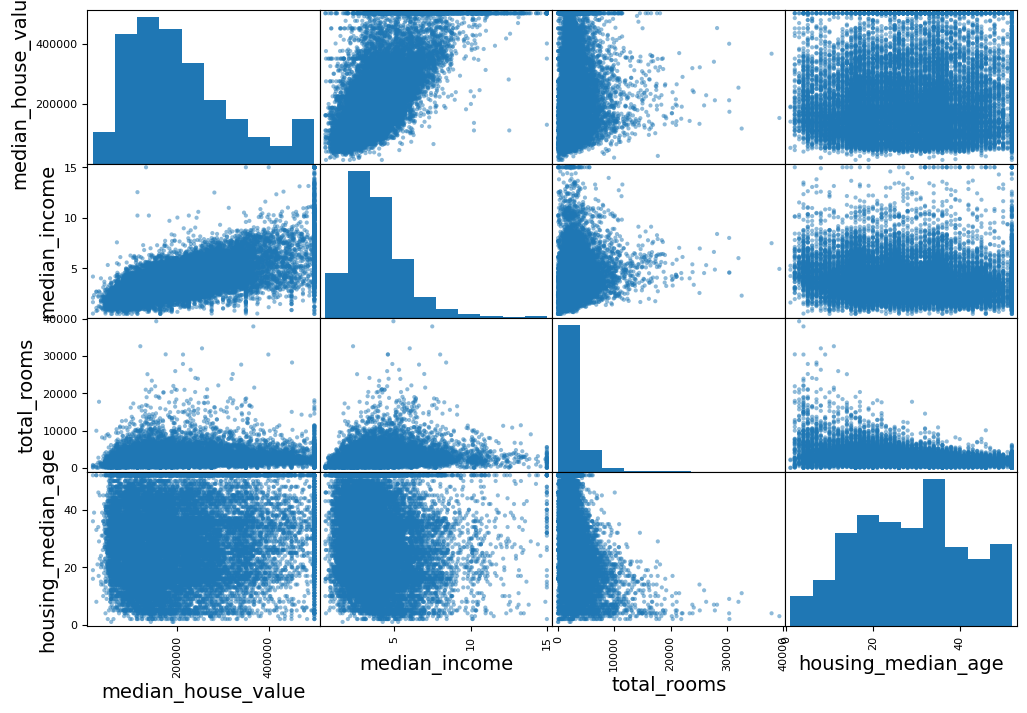

In [ ]:
from pandas.plotting import scatter_matrix
# Import specialized plotting function from pandas
# scatter_matrix = Creates grid of scatter plots + histograms
# Part of pandas.plotting module (visualization tools)

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
# Select 4 features to analyze together
# WHY THESE 4?
#   → median_house_value: Our TARGET (what we want to predict)
#   → median_income: STRONGEST correlator (0.69 from previous analysis)
#   → total_rooms: Represents property size
#   → housing_median_age: Represents property age
#
# WHY ONLY 4?
#   → Scatter matrix creates N×N grid (4×4 = 16 plots)
#   → More features = harder to read (9 features = 81 plots!)
#   → Focus on most important relationships
#   → Keep visualization manageable

scatter_matrix(housing[attributes], figsize=(12, 8))
# Create the scatter matrix visualization
#
# BREAKDOWN:
# housing[attributes]
#   → Extract only the 4 selected columns from housing DataFrame
#   → Creates temporary DataFrame with just these features
#   → Shape: 20,640 rows × 4 columns
#
# scatter_matrix()
#   → Creates 4×4 grid of plots (16 total subplots)
#   → DIAGONAL: Histograms (distribution of each feature)
#   → OFF-DIAGONAL: Scatter plots (relationships between pairs)
#
# figsize=(12, 8)
#   → Canvas size: 12 inches wide × 8 inches tall
#   → Makes plots readable (default would be tiny)
#   → Industry standard for multi-plot figures

# WHAT THE GRID LOOKS LIKE:
#
#                     Col 1              Col 2           Col 3              Col 4
#                median_house_value  median_income  total_rooms  housing_median_age
#
# Row 1 (house_value)    [HISTOGRAM]      [SCATTER]      [SCATTER]         [SCATTER]
# Row 2 (income)         [SCATTER]        [HISTOGRAM]    [SCATTER]         [SCATTER]
# Row 3 (total_rooms)    [SCATTER]        [HISTOGRAM]      [SCATTER]
# Row 4 (median_age)     [SCATTER]        [SCATTER]      [SCATTER]         [HISTOGRAM]
#
# 16 SUBPLOTS EXPLAINED:
#
# DIAGONAL (4 plots):
#   → Row 1, Col 1: Histogram of median_house_value
#   → Row 2, Col 2: Histogram of median_income
#   → Row 3, Col 3: Histogram of total_rooms
#   → Row 4, Col 4: Histogram of housing_median_age
#   → Shows DISTRIBUTION of each feature alone
#
# OFF-DIAGONAL (12 plots):
#   → Row 1, Col 2: house_value vs income (KEY PLOT! ⭐)
#   → Row 1, Col 3: house_value vs total_rooms
#   → Row 1, Col 4: house_value vs median_age
#   → Row 2, Col 1: income vs house_value (mirror of Row 1, Col 2)
#   → Row 2, Col 3: income vs total_rooms
#   → Row 2, Col 4: income vs median_age
#   → Row 3, Col 1: total_rooms vs house_value (mirror of Row 1, Col 3)
#   → Row 3, Col 2: total_rooms vs income (mirror of Row 2, Col 3)
#   → Row 3, Col 4: total_rooms vs median_age
#   → Row 4, Col 1: median_age vs house_value (mirror of Row 1, Col 4)
#   → Row 4, Col 2: median_age vs income (mirror of Row 2, Col 4)
#   → Row 4, Col 3: median_age vs total_rooms (mirror of Row 3, Col 4)
#   → Shows RELATIONSHIPS between feature pairs
#
# NOTE: Plots are MIRRORED across diagonal
#   → Row 2, Col 1 = Row 1, Col 2 (same data, axes flipped)
#   → Only need to look at upper or lower triangle

# save_fig("scatter_matrix_plot")  # extra code
# Custom function (not standard library)
# Saves the figure to disk as an image file
# Likely defined earlier in the notebook for book publishing
# YOU CAN SKIP THIS LINE - it's for creating book diagrams
# Standard alternative: plt.savefig("scatter_matrix_plot.png")
plt.savefig("scatter_matrix_plot.png")

plt.show()
# Display the figure window with all 16 subplots
# Without this, nothing appears!
# Shows the complete 4×4 grid

# WHAT TO LOOK FOR IN THE PLOTS:
#
# 1. DIAGONAL HISTOGRAMS:
#    → Check for normal distribution (bell curve)
#    → Look for outliers/skewness
#    → median_house_value: Right-skewed (capped at $500k)
#    → median_income: Roughly normal
#    → total_rooms: Heavily right-skewed (most small, few large)
#    → housing_median_age: Roughly uniform
#
# 2. KEY SCATTER PLOT (Row 1, Col 2): house_value vs income ⭐
#    → STRONGEST RELATIONSHIP (0.69 correlation)
#    → Clear upward trend: higher income → higher price
#    → Some clustering patterns
#    → Horizontal line at $500k (data cap)
#
# 3. OTHER SCATTER PLOTS:
#    → house_value vs total_rooms: Weak pattern (lots of noise)
#    → house_value vs median_age: Almost no pattern
#    → income vs total_rooms: Slight positive trend
#    → income vs median_age: No clear pattern
#
# 4. PATTERNS TO NOTICE:
#    → Linear relationships (straight line trends)
#    → Clusters (groups of points)
#    → Outliers (points far from main cluster)
#    → Horizontal/vertical lines (data caps or binning)

# INSIGHTS FROM THIS VISUALIZATION:
# ✅ Confirms median_income is best predictor (clear linear trend)
# ✅ Shows $500k cap in house_value (horizontal line at top)
# ✅ Reveals total_rooms has many outliers (huge properties)
# ✅ Demonstrates weak relationship between age and price
# ⚠️ Suggests need for feature engineering (rooms/household ratio)
# ⚠️ Shows potential need to handle outliers in total_rooms

# CODING TIPS:
# → Always limit features (4-6 max for readability)
# → Put target variable first in list (leftmost column/top row)
# → Use figsize=(12, 8) minimum for 4×4 grid
# → Focus on plots involving target variable (first row/column)
# → Diagonal histograms help spot data issues

# 5.Feature Engineering

In [ ]:
# Feature Engineering: Creating derived features from raw data

# 1. Average rooms per household (larger = more spacious homes)
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]

# 2. Proportion of bedrooms to total rooms (higher = more bedroom-focused layout)
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]

# 3. Average household size (higher = more people living together)
housing["people_per_house"] = housing["population"] / housing["households"]

# Why? These ratios are more predictive than raw totals because they:
# - Normalize data across districts of different sizes
# - Capture meaningful patterns (e.g., spaciousness, crowding, layout)
# - Better correlate with house prices than absolute numbers


In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


# 6. Prepare the data for ML algorithm

In [ ]:
# Handling Missing Values in "total_bedrooms" column - 3 strategies:

# Option 1: Drop rows with missing values
# housing.dropna(subset=["total_bedrooms"], inplace=True)
# Pros: Simple, keeps data quality high
# Cons: Loses data (bad if many missing values)
# Use when: < 5% missing data

# Option 2: Drop the entire column
# housing.drop("total_bedrooms", axis=1)
# Pros: Keeps all rows intact
# Cons: Loses potentially useful feature
# Use when: Too many missing values OR feature not important

# Option 3: Impute with median (BEST for ML)
median = housing["total_bedrooms"].median()  # Calculate median from non-null values
housing["total_bedrooms"].fillna(median, inplace=True)  # Replace NaN with median
# Pros: Keeps all data + feature, robust to outliers
# Cons: Adds artificial values (but minimal impact)
# Use when: Moderate missing data + feature is important

# Why median? More robust than mean for skewed/outlier-heavy data (common in housing)


/tmp/ipython-input-1206913227.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)  # Replace NaN with median


In [ ]:
# Finding and inspecting rows with missing values

# Step 1: Identify which rows have ANY null values across ALL columns
null_rows_idx = housing.isnull().any(axis=1)
# .isnull() - Returns DataFrame of True/False for each cell (True = missing)
# .any(axis=1) - Checks each ROW (axis=1), returns True if ANY column is null
# Result: Boolean Series [False, True, False, True, ...] marking rows with nulls

# Step 2: View first 5 rows that contain null values
housing.loc[null_rows_idx].head()
# .loc[] - Filters DataFrame using boolean mask (selects only True rows)
# .head() - Shows first 5 filtered rows for inspection

# Example output:
#      total_rooms  households  total_bedrooms  population
# 290         2500         500             NaN        1200  <- Missing bedroom data
# 341         1800         300             NaN         900  <- Missing bedroom data

# Use case: Quick diagnostic to understand WHERE and HOW missing data appears
# before deciding on Option 1, 2, or 3 from previous code


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
# Testing Option 1: Dropping rows with missing values (using a COPY to preserve original)

# Step 1: Create a copy to test without modifying original data
housing_option1 = housing.copy()
# .copy() - Creates independent copy (changes won't affect original 'housing')
# Best practice: Always test data cleaning on copies first!

# Step 2: Drop rows where "total_bedrooms" is null
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)
# Removes all rows with NaN in total_bedrooms column
# inplace=True - Modifies housing_option1 directly (no need for reassignment)

# Step 3: Try to view the rows that HAD nulls (using OLD index from original)
housing_option1.loc[null_rows_idx].head()
# Result: Returns EMPTY DataFrame (0 rows)
# Why? null_rows_idx still references row indices (290, 341, etc.) BUT
#      those rows were DELETED from housing_option1 by dropna()
# The indices no longer exist in housing_option1!

# Key lesson: After dropna(), the null rows are GONE - you can't inspect them anymore
# That's why we made a copy first - original 'housing' still has them for comparison


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
# Testing Option 2: Dropping the entire column (using a COPY to preserve original)

# Step 1: Create a copy to test without modifying original data
housing_option2 = housing.copy()
# Independent copy for testing - original 'housing' remains unchanged

# Step 2: Drop the ENTIRE "total_bedrooms" column
housing_option2.drop("total_bedrooms", axis=1, inplace=True)
# axis=1 - Operates on COLUMNS (axis=0 would be rows)
# Removes the whole feature, not just rows with missing values
# inplace=True - Modifies housing_option2 directly

# Step 3: View rows that HAD nulls (using same index from original)
housing_option2.loc[null_rows_idx].head()
# Result: Shows the SAME 5 rows, but "total_bedrooms" column is MISSING
# Why? The ROWS still exist (unlike Option 1), but the problematic column is gone
# Other columns (total_rooms, population, etc.) are intact

# Example output:
#      total_rooms  households  population  rooms_per_house  ...
# 290         2500         500        1200             5.0   <- No total_bedrooms!
# 341         1800         300         900             6.0   <- Column removed

# Key difference from Option 1:
# - Option 1: Keeps column, removes rows → Loses data points
# - Option 2: Keeps rows, removes column → Loses feature (but preserves samples)


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
# Testing Option 3: Imputing missing values with median (RECOMMENDED for ML)

# Step 1: Create a copy to test without modifying original data
housing_option3 = housing.copy()
# Independent copy for safe testing

# Step 2: Calculate median from NON-NULL values in original data
median = housing["total_bedrooms"].median()
# Computes median ONLY from existing values (ignores NaN automatically)
# Example: If median = 435.0, this becomes our "best guess" replacement

# Step 3: Fill all NaN values with the calculated median
housing_option3["total_bedrooms"].fillna(median, inplace=True)
# .fillna() - Replaces NaN with specified value (median here)
# inplace=True - Modifies housing_option3 directly

# Step 4: View rows that HAD nulls (now they're filled!)
housing_option3.loc[null_rows_idx].head()
# Result: Shows SAME 5 rows, but "total_bedrooms" now has MEDIAN value
# Example output:
#      total_rooms  households  total_bedrooms  population
# 290         2500         500           435.0        1200  <- Was NaN, now median!
# 341         1800         300           435.0         900  <- Was NaN, now median!

# Key advantages of Option 3:
# ✓ Keeps ALL rows (unlike Option 1)
# ✓ Keeps ALL columns (unlike Option 2)
# ✓ Preserves data for ML model training
# ✓ Median is robust to outliers (better than mean for housing data)

# Why this is BEST: No data loss, minimal distortion, ML-friendly


/tmp/ipython-input-3284840956.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
# Using Scikit-Learn's SimpleImputer for professional missing data handling

from sklearn.impute import SimpleImputer
# SimpleImputer - Sklearn's tool for imputing (filling) missing values
# More powerful than manual .fillna() - works on MULTIPLE columns at once!

# Create an imputer object with median strategy
imputer = SimpleImputer(strategy="median")
# strategy="median" - Fill missing values with column's median
# Other options: "mean", "most_frequent", "constant"

# Why use SimpleImputer instead of manual fillna()?
# 1. Handles MULTIPLE columns simultaneously (scales better)
# 2. "Learns" the median from TRAINING data, applies to TEST data
#    (Critical for proper train/test split - avoids data leakage!)
# 3. Returns NumPy arrays (works seamlessly in ML pipelines)
# 4. Can be saved/loaded for production deployment

# Note: Median only works on NUMERIC data, so need to separate text columns first!


In [ ]:
import numpy as np
# Complete workflow: Using SimpleImputer to handle missing numeric data

# Step 1: Select ONLY numeric columns (median doesn't work on text!)
housing_num = housing.select_dtypes(include=[np.number])
# Filters out non-numeric columns like "ocean_proximity" (categorical)
# Keeps: longitude, latitude, housing_median_age, total_rooms, etc.

# Step 2: FIT the imputer - "Learn" the median of each numeric column
imputer.fit(housing_num)
# Calculates and stores median for EACH column from training data
# Doesn't modify data yet, just learns the statistics

# Step 3: Check what medians were learned
imputer.statistics_
# Returns array of medians for each column (in order)
# Example: array([-118.51, 34.26, 29.0, 2119.5, 435.0, ...])

# Step 4: Verify it matches manual calculation
housing_num.median().values
# Should be IDENTICAL to imputer.statistics_
# Confirms imputer learned correctly

# Step 5: TRANSFORM - Apply learned medians to fill NaN values
X = imputer.transform(housing_num)
# Returns NumPy array with NaNs replaced by respective column medians
# X is now a 2D array, NOT a DataFrame (loses column names/index)

# Step 6: Check which features were processed
imputer.feature_names_in_
# Shows column names imputer was fitted on (for verification)

# Step 7: Convert back to DataFrame (restore structure for analysis)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
# X - The imputed NumPy array
# columns=housing_num.columns - Restore original column names
# index=housing_num.index - Restore original row indices

# Step 8: Verify imputation worked on previously null rows
housing_tr.loc[null_rows_idx].head()
# Shows rows that HAD missing values - now filled with median!
# Example output:
#      total_bedrooms  ...
# 290           435.0  <- Was NaN, now median!
# 341           435.0  <- Was NaN, now median!

# Why this workflow matters for ML:
# ✓ Fit on TRAIN data → Transform TRAIN + TEST separately (no data leakage)
# ✓ Ensures test data uses ONLY training statistics (realistic deployment)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [ ]:
# Verification steps after imputation

# Step 1: Check the imputer's strategy setting
imputer.strategy
# Returns: 'median'
# Confirms which strategy was used to fill missing values
# (Useful when you have multiple imputers with different strategies)

# Step 2: Recreate DataFrame from imputed NumPy array
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
# Converts the transformed NumPy array back to pandas DataFrame
# Restores column names and row indices for easier inspection
# "tr" suffix often means "transformed" data

# Step 3: Inspect previously null rows to verify imputation
housing_tr.loc[null_rows_idx].head()
# Uses the ORIGINAL null_rows_idx boolean mask (from beginning)
# Shows first 5 rows that HAD missing values
# Now displays those rows WITH imputed values

# Expected output:
#      longitude  latitude  ...  total_bedrooms  population
# 290     -121.97     37.64  ...          435.0        1392  <- Filled!
# 341     -121.98     37.63  ...          435.0        1212  <- Filled!
# 538     -117.99     33.73  ...          435.0        1966  <- Filled!

# Key observations:
# ✓ total_bedrooms now shows 435.0 (the median) instead of NaN
# ✓ All OTHER columns remain unchanged (only NaNs were affected)
# ✓ Row indices match original data (290, 341, etc.)
# ✓ No rows or columns were deleted - full dataset preserved!

# This confirms SimpleImputer successfully filled missing values!


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [ ]:
# Using IsolationForest for OUTLIER DETECTION (anomaly detection)

from sklearn.ensemble import IsolationForest

# Create an Isolation Forest detector
isolation_forest = IsolationForest(random_state=42)
# IsolationForest - Unsupervised ML algorithm for finding outliers
# Works by "isolating" observations in a tree structure
# Outliers are easier to isolate (fewer splits needed)
# random_state=42 - Ensures reproducible results

# Fit the model AND predict outliers in one step
outlier_pred = isolation_forest.fit_predict(X)
# fit_predict() - Trains on data AND returns predictions
# X - The imputed numeric data (NumPy array from earlier)
# Returns array of 1s and -1s

# Output interpretation:
outlier_pred
# Returns: array([1, 1, 1, ..., -1, 1, 1])
#
#  1 = INLIER (normal data point) ✓
# -1 = OUTLIER (anomalous data point) ⚠️

# Example output breakdown:
# array([1, 1, 1, -1, 1, 1, 1, 1, -1, ...])
#        ^  ^  ^  ^^ ^  ^  ^  ^  ^^
#        Normal |  Normal    |
#           Outlier!      Outlier!

# How to use the results:
# Count outliers:
# (outlier_pred == -1).sum()  # e.g., 2068 outliers

# Get outlier percentage:
# (outlier_pred == -1).mean() * 100  # e.g., ~10% are outliers

# Filter out outliers:
# housing_clean = housing_tr[outlier_pred == 1]

# Or investigate outliers:
# housing_outliers = housing_tr[outlier_pred == -1]

# Common use cases:
# • Remove extreme outliers before training ML models
# • Flag suspicious transactions (fraud detection)
# • Identify data quality issues
# • Find unusual patterns in sensor data

# Note: By default, contamination=0.1 (assumes 10% are outliers)
# Can adjust: IsolationForest(contamination=0.05) for 5%


array([-1, -1, -1, ...,  1,  1,  1])

In [ ]:
#housing = housing.iloc[outlier_pred == 1] to drop outliers
#housing_labels = housing_labels.iloc[outlier_pred == 1]

In [ ]:
# Extract and examine CATEGORICAL data (non-numeric columns)

# Step 1: Select the categorical column
housing_cat = housing[["ocean_proximity"]]
# Uses DOUBLE brackets [[]] to keep it as a DataFrame (not Series)
# "ocean_proximity" - Text categories describing location relative to ocean
# This is our ONLY categorical feature in the dataset

# Step 2: View first 8 rows
housing_cat.head(8)
# Displays sample of categorical values

# Expected output:
#     ocean_proximity
# 0        NEAR BAY      <- Text category
# 1        NEAR BAY
# 2        NEAR BAY
# 3        NEAR BAY
# 4        NEAR BAY
# 5      <1H OCEAN      <- Different category
# 6      <1H OCEAN
# 7      <1H OCEAN

# Why separate categorical from numeric?
# ✗ Can't calculate median/mean on text!
# ✗ Can't use directly in most ML models (need numbers)
# ✓ Need special encoding techniques (coming next!)

# Common categories in this column:
# • "<1H OCEAN"  - Less than 1 hour from ocean
# • "INLAND"     - Far from ocean
# • "NEAR BAY"   - Close to bay area
# • "NEAR OCEAN" - Close to ocean
# • "ISLAND"     - On an island (rare)

# Next steps will encode these text categories into numbers
# using techniques like OrdinalEncoder or OneHotEncoder


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY


In [ ]:
# Using OrdinalEncoder to convert CATEGORIES to NUMBERS

from sklearn.preprocessing import OrdinalEncoder

# Step 1: Create the encoder
ordinal_encoder = OrdinalEncoder()
# OrdinalEncoder - Converts text categories to integer codes
# Assigns a unique number to each category (0, 1, 2, 3, ...)

# Step 2: Fit and transform the categorical data
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# fit() - Learns all unique categories from the data
# transform() - Converts categories to their assigned numbers
# Returns a NumPy array of floats

# Step 3: View first 8 encoded values
housing_cat_encoded[:8]
# Expected output:
# array([[3.],  # NEAR BAY
#        [3.],  # NEAR BAY
#        [3.],  # NEAR BAY
#        [3.],  # NEAR BAY
#        [3.],  # NEAR BAY
#        [0.],  # <1H OCEAN
#        [0.],  # <1H OCEAN
#        [0.]]) # <1H OCEAN

# Step 4: Check the learned categories
ordinal_encoder.categories_
# Returns: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
#                  dtype=object)]
#
# Mapping created:
# '<1H OCEAN'  -> 0
# 'INLAND'     -> 1
# 'ISLAND'     -> 2
# 'NEAR BAY'   -> 3
# 'NEAR OCEAN' -> 4
# (Alphabetical order by default!)

# ⚠️ IMPORTANT WARNING about OrdinalEncoder:
# This creates an ORDERING: 0 < 1 < 2 < 3 < 4
# ML models might think: ISLAND (2) is "between" INLAND (1) and NEAR BAY (3)
# This is WRONG for ocean_proximity - there's no meaningful order!
#
# Problem: Model might think:
# • INLAND (1) is "closer" to <1H OCEAN (0) than ISLAND (2)
# • NEAR OCEAN (4) is "twice as much" as INLAND (1)
#
# ✓ Better for: Ordinal categories like ["cold", "warm", "hot"] (0, 1, 2)
# ✗ Bad for: Nominal categories like ocean_proximity (no natural order)
#
# → For ocean_proximity, should use OneHotEncoder instead!


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# Using OneHotEncoder - PROPER way to encode nominal categories (no ordering)

# ===== PART 1: Basic OneHotEncoder (returns SPARSE matrix) =====
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# OneHotEncoder - Creates binary columns (0 or 1) for each category
# Default: Returns SPARSE matrix (memory efficient for large datasets)

housing_cat_1hot
# Output: <20640x5 sparse matrix of type '<class 'numpy.float64'>'
# 20640 rows, 5 columns (one per category)
# Sparse = only stores non-zero values to save memory

# View as regular array:
housing_cat_1hot.toarray()
# Converts sparse -> dense array
# array([[0., 0., 0., 1., 0.],  # NEAR BAY (4th column = 1)
#        [0., 0., 0., 1., 0.],  # NEAR BAY
#        [1., 0., 0., 0., 0.],  # <1H OCEAN (1st column = 1)
#        ...])


# ===== PART 2: Dense output (regular array instead of sparse) =====
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# sparse_output=False - Returns regular NumPy array (easier to work with)

housing_cat_1hot
# Now returns: array([[0., 0., 0., 1., 0.], ...])  directly


# ===== PART 3: Check learned categories =====
cat_encoder.categories_
# Returns: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])]
# Column mapping:
# Col 0: <1H OCEAN,  Col 1: INLAND,  Col 2: ISLAND,
# Col 3: NEAR BAY,   Col 4: NEAR OCEAN


# ===== PART 4: Compare with pandas get_dummies() =====
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)
# Pandas version - Quick one-hot encoding
#    ocean_proximity_INLAND  ocean_proximity_NEAR BAY
# 0                       1                         0
# 1                       0                         1

cat_encoder.transform(df_test)
# Sklearn version on same data:
# array([[0., 1., 0., 0., 0.],  # INLAND (column 1)
#        [0., 0., 0., 1., 0.]]) # NEAR BAY (column 3)


# ===== PART 5: Handling UNKNOWN categories =====
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
# "<2H OCEAN" - NEW category not seen during training!

pd.get_dummies(df_test_unknown)
# Pandas just creates a new column (dangerous in production!)
#    ocean_proximity_<2H OCEAN  ocean_proximity_ISLAND
# 0                          1                       0
# 1                          0                       1

# Sklearn WITHOUT handling unknowns - would ERROR!
# cat_encoder.transform(df_test_unknown)  # ValueError!

# SOLUTION: Tell encoder to ignore unknowns
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)
# array([[0., 0., 0., 0., 0.],  # <2H OCEAN -> all zeros (ignored)
#        [0., 0., 1., 0., 0.]]) # ISLAND -> column 2 = 1 ✓
# Unknown categories become all zeros (safer for production!)


# ===== PART 6: Get feature names =====
cat_encoder.feature_names_in_
# Returns: array(['ocean_proximity'], dtype=object)
# The original input column name

cat_encoder.get_feature_names_out()
# Returns: array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
#                 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
#                 'ocean_proximity_NEAR OCEAN'], dtype=object)
# Generated column names for the one-hot encoded features


# ===== PART 7: Create a nice DataFrame output =====
df_output = pd.DataFrame(
    cat_encoder.transform(df_test_unknown),
    columns=cat_encoder.get_feature_names_out(),
    index=df_test_unknown.index
)

df_output
#    ocean_proximity_<1H OCEAN  ...  ocean_proximity_NEAR OCEAN
# 0                        0.0  ...                         0.0  <- Unknown
# 1                        0.0  ...                         0.0  <- ISLAND


# ===== KEY TAKEAWAYS =====
# OneHotEncoder vs OrdinalEncoder:
# ✓ OneHotEncoder: No artificial ordering (best for nominal data)
# ✗ OrdinalEncoder: Creates ordering 0<1<2<3 (misleading!)

# OneHotEncoder vs pd.get_dummies():
# ✓ OneHotEncoder: Handles unknowns safely, consistent with training
# ✓ Can use in sklearn pipelines (coming next!)
# ✗ pd.get_dummies(): Creates new columns for unknowns (breaks models!)

# sparse_output parameter:
# True (default): Memory efficient for large datasets
# False: Easier to inspect and debug

# handle_unknown="ignore":
# Essential for production - gracefully handles new categories!


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


## 7. Feature Scaling

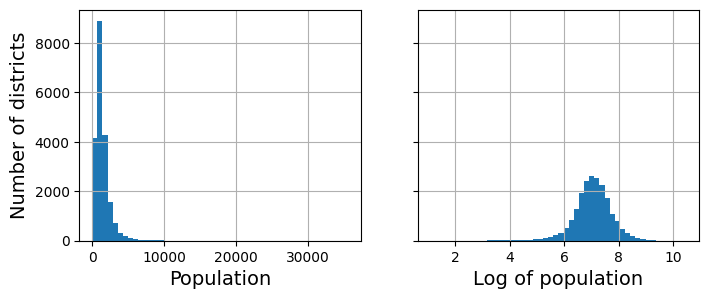

In [ ]:
# FEATURE SCALING - Making features comparable in magnitude

# ===== PART 1: MinMaxScaler (Range Scaling) =====
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
# MinMaxScaler - Squashes all values into a specified range
# feature_range=(-1, 1) - Scale to [-1, 1] instead of default [0, 1]
# Formula: X_scaled = (X - X_min) / (X_max - X_min) * (max - min) + min

housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
# fit() - Learns min and max from training data
# transform() - Applies: (value - min) / (max - min) * 2 - 1
# Result: All features now between -1 and 1

# Example: If population ranges from 3 to 35,682
# • 3 → -1.0 (minimum)
# • 35,682 → 1.0 (maximum)
# • 17,842 (midpoint) → ~0.0

# ⚠️ Sensitive to OUTLIERS! One extreme value affects entire scale


# ===== PART 2: StandardScaler (Z-score Normalization) =====
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
# StandardScaler - Centers data around 0 with standard deviation of 1
# Formula: X_scaled = (X - mean) / std_deviation
# Result: Mean=0, StdDev=1 (standard normal distribution shape)

housing_num_std_scaled = std_scaler.fit_transform(housing_num)
# fit() - Learns mean and std from training data
# transform() - Applies: (value - mean) / std

# Example: If population has mean=1,425 and std=1,132
# • 1,425 (mean) → 0.0
# • 2,557 (mean + 1 std) → 1.0
# • 293 (mean - 1 std) → -1.0

# ✓ LESS sensitive to outliers than MinMaxScaler
# ✓ Most common choice for neural networks, linear models


# ===== PART 3: Log Transform (Handling Skewed Distributions) =====
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
# Create 2 side-by-side plots with shared y-axis

# LEFT PLOT: Original population (heavily right-skewed)
housing["population"].hist(ax=axs[0], bins=50)
# Most districts have LOW population (0-2000)
# Few districts have VERY HIGH population (outliers at 30,000+)
# Long right tail → skewed distribution

# RIGHT PLOT: Log-transformed population (more normal)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
# np.log() compresses large values more than small values
# 10 → 2.3,  100 → 4.6,  1000 → 6.9,  10000 → 9.2
# Result: More bell-shaped (closer to normal distribution)

axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

# Why log transform?
# ✓ Reduces impact of extreme outliers
# ✓ Makes skewed data more normal (helps many ML algorithms)
# ✓ Brings features onto similar scale naturally
# ✗ Can't use with zero/negative values (use np.log1p(x) = log(1+x) instead)


# ===== WHEN TO USE EACH SCALER =====

# MinMaxScaler:
# ✓ Neural networks (want bounded inputs)
# ✓ Image data (already in 0-255 range)
# ✗ Avoid if: Lots of outliers (will squash most values)

# StandardScaler:
# ✓ Linear models (Logistic Regression, SVM, Linear Regression)
# ✓ PCA, K-Means clustering
# ✓ Most common default choice
# ✓ Better with outliers than MinMaxScaler

# Log Transform (before scaling):
# ✓ Heavy right-skew (income, population, prices)
# ✓ Exponential relationships
# ✓ Count data with wide ranges
# Then follow with StandardScaler

# Real workflow example:
# 1. housing["log_population"] = np.log1p(housing["population"])
# 2. std_scaler.fit_transform(housing_num)  # Scale all features
# 3. Now population is on similar scale to other features!


# ===== IMPORTANT REMINDERS =====
# • ALWAYS fit on TRAINING data only (like imputer!)
# • Transform BOTH training and test data with same scaler
# • Don't fit on test data (would leak information!)

# Correct:
# scaler.fit(X_train)           # Learn from training
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)  # Apply same scaling

# Wrong:
# scaler.fit(X_test)  # ✗ Learns from test data - data leakage!


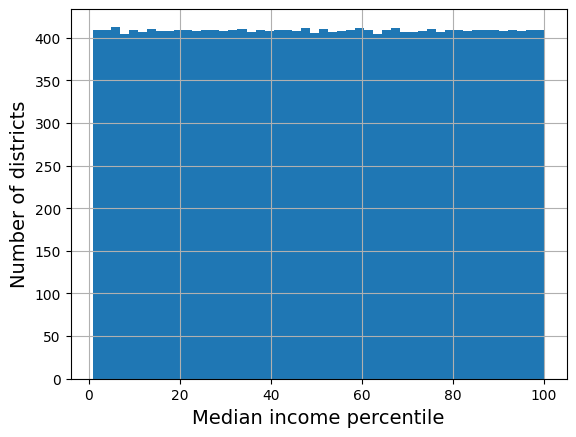

In [ ]:
# DISCRETIZATION (Binning) - Converting continuous values to categories

# ===== PART 1: Calculate percentile boundaries =====
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
# Creates 99 boundary values at 1st, 2nd, 3rd, ..., 99th percentiles
# Example result: [0.4999, 1.0537, 1.2266, ..., 14.9701, 15.0001]
#
# range(1, 100) generates: 1, 2, 3, ..., 99
# np.percentile(data, p) finds the value where p% of data is below it
#
# Example:
# • 25th percentile (Q1) ≈ 2.56 → 25% of districts earn ≤ $25,600
# • 50th percentile (median) ≈ 3.54 → 50% of districts earn ≤ $35,400
# • 75th percentile (Q3) ≈ 4.74 → 75% of districts earn ≤ $47,400


# ===== PART 2: Bin continuous values into percentile groups =====
flattened_median_income = pd.cut(
    housing["median_income"],
    bins=[-np.inf] + percentiles + [np.inf],
    labels=range(1, 100 + 1)
)
# pd.cut() - Divides continuous data into discrete bins
#
# bins parameter creates 100 bins:
# [-∞, p1], [p1, p2], [p2, p3], ..., [p99, ∞]
# • -np.inf: Captures all values below 1st percentile
# • percentiles: The 99 boundary values
# • np.inf: Captures all values above 99th percentile
#
# labels parameter: Assigns 1, 2, 3, ..., 100 to each bin
#
# Result: Each district gets a percentile rank (1-100)
# Example transformations:
# • Income = 2.35 → Bin 20 (20th percentile)
# • Income = 5.82 → Bin 82 (82nd percentile)
# • Income = 15.00 → Bin 100 (top percentile)


# ===== PART 3: Visualize the flattened distribution =====
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
#
# This histogram shows UNIFORM distribution (flat bars)
# Each percentile bin has roughly THE SAME number of districts (~206 each)
#
# Why? Because we created bins AT percentiles!
# • Bin 1 contains 1% of data (1st percentile)
# • Bin 50 contains 1% of data (50th percentile)
# • Bin 100 contains 1% of data (100th percentile)
#
# Compare to original distribution (would be right-skewed):
# housing["median_income"].hist(bins=50)  # Most values low, few very high


# ===== WHY USE DISCRETIZATION? =====

# 1. FLATTEN SKEWED DISTRIBUTIONS:
#    Original: Income ranges 0.5 to 15.0 (heavily skewed)
#    Binned: Percentiles 1 to 100 (uniform)
#    → Reduces impact of outliers naturally

# 2. CAPTURE NON-LINEAR RELATIONSHIPS:
#    Maybe income effect isn't linear: $10k→$20k has bigger impact than $100k→$110k
#    Binning allows model to learn different behavior in each range

# 3. MAKE CATEGORICAL for TREE MODELS:
#    Decision trees work well with categories
#    "Income percentile 80-90" becomes a distinct feature

# 4. ROBUST TO OUTLIERS:
#    Extreme income of $50k becomes "Bin 100" just like $15k
#    Less sensitive than raw values


# ===== ALTERNATIVE BINNING STRATEGIES =====

# Equal-width bins (NOT percentiles):
# pd.cut(housing["median_income"], bins=10)  # 10 equal ranges
# Problem: Might have empty bins if data is skewed!

# Quantile-based (like our example):
# pd.qcut(housing["median_income"], q=10)  # 10 equal-sized bins
# Same as our percentile approach but simpler syntax

# Custom boundaries (domain knowledge):
# income_bins = [0, 1.5, 3, 5, 10, np.inf]
# labels = ["very_low", "low", "medium", "high", "very_high"]
# pd.cut(housing["median_income"], bins=income_bins, labels=labels)


# ===== COMMON USE CASES =====

# Age groups: [0, 18, 35, 50, 65, 100] → "child", "young_adult", "middle_age", "senior"
# Credit score: [300, 580, 670, 740, 800, 850] → "poor", "fair", "good", "very_good", "excellent"
# Temperature: [-∞, 0, 10, 20, 30, ∞] → "freezing", "cold", "cool", "warm", "hot"


# ===== IMPORTANT NOTES =====

# ⚠️ FIT ON TRAINING DATA ONLY:
# train_percentiles = [np.percentile(X_train["income"], p) for p in range(1, 100)]
# X_train_binned = pd.cut(X_train["income"], bins=train_percentiles, ...)
# X_test_binned = pd.cut(X_test["income"], bins=train_percentiles, ...)
# # Use SAME bins for test data!

# ⚠️ INFORMATION LOSS:
# Original: 3.5421, 3.5834 → Different values
# Binned: Both → Bin 50 → Treated as identical
# Trade-off: Less precision but more robustness

# ⚠️ Number of bins matters:
# Too few (10 bins): Lose too much information
# Too many (1000 bins): Back to continuous, defeats purpose
# Common: 10-100 bins depending on data size


In [ ]:
# Using IsolationForest for OUTLIER DETECTION (anomaly detection)

from sklearn.ensemble import IsolationForest

# Create an Isolation Forest detector
isolation_forest = IsolationForest(random_state=42)
# IsolationForest - Unsupervised ML algorithm for finding outliers
# Works by "isolating" observations in a tree structure
# Outliers are easier to isolate (fewer splits needed)
# random_state=42 - Ensures reproducible results

# Fit the model AND predict outliers in one step
outlier_pred = isolation_forest.fit_predict(X)
# fit_predict() - Trains on data AND returns predictions
# X - The imputed numeric data (NumPy array from earlier)
# Returns array of 1s and -1s

# Output interpretation:
outlier_pred
# Returns: array([1, 1, 1, ..., -1, 1, 1])
#
#  1 = INLIER (normal data point) ✓
# -1 = OUTLIER (anomalous data point) ⚠️

# Example output breakdown:
# array([1, 1, 1, -1, 1, 1, 1, 1, -1, ...])
#        ^  ^  ^  ^^ ^  ^  ^  ^  ^^
#        Normal |  Normal    |
#           Outlier!      Outlier!

# How to use the results:
# Count outliers:
# (outlier_pred == -1).sum()  # e.g., 2068 outliers

# Get outlier percentage:
# (outlier_pred == -1).mean() * 100  # e.g., ~10% are outliers

# Filter out outliers:
# housing_clean = housing_tr[outlier_pred == 1]

# Or investigate outliers:
# housing_outliers = housing_tr[outlier_pred == -1]

# Common use cases:
# • Remove extreme outliers before training ML models
# • Flag suspicious transactions (fraud detection)
# • Identify data quality issues
# • Find unusual patterns in sensor data

# Note: By default, contamination=0.1 (assumes 10% are outliers)
# Can adjust: IsolationForest(contamination=0.05) for 5%